In [ ]:
import keras
keras.__version__

# Introducción a las convnets: Clasificando números



Vamos a echarle un vistazo a un ejemplo sencillo de una convnet. La utilizaremos para clasificar el dataset MNIST, que es un dataset abierto que contiene números escritos a mano. 

![Números escritos a mano del dataset MNIST](http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png)

Vamos a crear una primera convnet basica. Es una pila de capas `Conv2D` y `MaxPooling2D`. 
Lo importante es notar que una convnet toma como input tensores de tamaño `(altura_imagen, anchura_imagen, canales_imagen)`. 
Para ello primero hay que averiguar el tamaño de las imágenes de nuestro dataset. 

La red debe tener las siguientes capas:

- Una capa convolucional (Conv2D) con 32 filtros de 3x3 y activación relu. En esta primera capa deberás indicar el tamaño del input (input_shape).
- Una segunda capa de Max Pooling (MaxPooling2D) de 2x2
- Una tercera capa convolucional con 64 filtros de 3x3 y activación relu
- Una cuarta capa de Max Pooling (MaxPooling2D) de 2x2
- Una quinta capa convolucional de 64 filtros de 3x3 y activación relu

Sabrás que lo has hecho bien cuando el output de model.summary() sea:

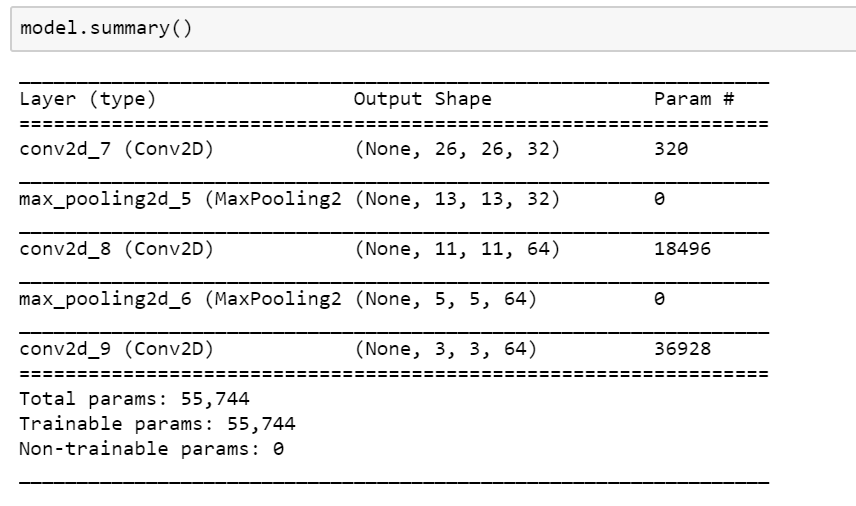


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(, , activation='', input_shape=()))
mode.add...

Puedes ver arriba que la salida de cada capa `Conv2D` y `MaxPooling2D` es un tensor 3D de dimensiones `(altura, anchura, canales)`. La anchura y la altura tienden a diminuir según vamos yendo mas profundo en la red. El número de canales está controlado por el primer argumento que se le pasa a 
las capas `Conv2D`  (e.j. 32 o 64).

El siguiente paso sería darle nuestro ultimo tensor (de dimensiones `(3, 3, 64)`) como entrada a una red densamente conectada. 
Estos clasificadores procesan vectores, que son 1D,  mientras que nuestra salida es un tensor 3D. 
Así que primero tendremos que aplanar nuestra salida 3D y convertirla en 1D y después añadir unas cuantas capas densas:

- Primero aplana la salida (flatten())
- Añade una primera capa de 64 neuronas y activación relu
- Añade una última capa de 10 neuronas (tantas como números puedes clasificar) y activación softwmax

Sabrás que lo has hecho bien cuando el summary tenga esta pinta:

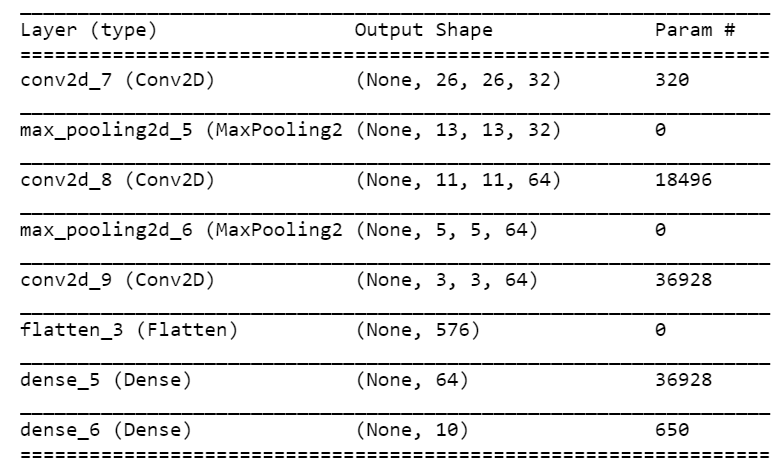

In [ ]:
model.add(layers...)


Queremos clasificar 10 categorías, lo que significa que nuestra capa final debe tener 10 nodos y una función de activación softmax. Vamos a ver que pinta tiene nuestra red:

Como puedes ver, nuestra salida de dimension `(3, 3, 64)` han sido aplanadas hasta convertirse en vectores de dimensión `(576,)`, antes de entrar en las dos capas densas.

Vamos ahora a entrenar nuestra red con las imágenes del dataset MNIST.

Leemos a continuación el dataset y lo metemos dentro de vectores: train_images, train_labels, test_images, test_labels

Antes de continuar, imprime:

- ¿Cual es el tamaño del dataset de training?
- ¿Qué pinta tiene el dataset de training?
- ¿Qué pinta tienen las etiquetas de training?
- Imprime la cuarta imagen del dataset de training


In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



A continuación vas a darle la forma adecuada a los datasets de training y test para poder meterlos a la red neuronal. Pasa las labels, que ahora mismo son números, a su forma categórica.

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = 
test_labels = 



Compila el modelo indicando cuales son los datos de entrenamiento y sus etiquetas. Utilizando el optimizador "rmsprop" y como loss function usa la entropía cruzada categórica.
Entrena después el modelo durante 5 épocas y un tamaño de batch de 64.

In [ ]:
model.compile( , , metrics=['accuracy'])
model.fit(, , , )

Vamos a evaluar el modelo con las imágenes de test:

In [ ]:
test_loss, test_acc = model.evaluate(,)

Imprime la accuracy del test que acabas de realizar:

In [ ]:
print()

Crea una imagen con un número escrito a mano y mira cual es la predicción. Prueba con unos cuantos números...¿Lo hace bien? 

In [ ]:
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt

img_width=28
img_height=28

img = image.load_img('siete.png', target_size=(img_width, img_height),grayscale=True)
x= image.img_to_array(img)
x = np.expand_dims(x, axis=0)





In [ ]:
model.save('net_numbers.h5')

Carga el modelo que acabas de guardar (load) y haz una predicción (predict_classes) con la imágen del número que acabas de escribir.

